In [1]:
import pandas as pd

In [9]:
%load_ext google.cloud.bigquery
%matplotlib inline

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [77]:
%%bigquery flight_data
SELECT * 
FROM `dronemissioncont-1535032526252.logs.5c7fd6cd4a78dd0001e315f8`
#WHERE FlightTime > '2019-08-21 06:00:00.603635+00:00'
ORDER BY Timestamp

In [4]:
def parse_flight_data(flight_data, col_names):
    cols = [flight_data['Timestamp'], flight_data['FlightTime']] + [flight_data[c].apply(pd.Series) for c in col_names]
    return pd.concat(cols, axis=1)

In [97]:
parsed = parse_flight_data(flight_data, ['Battery', 'Position', 'Speed'])

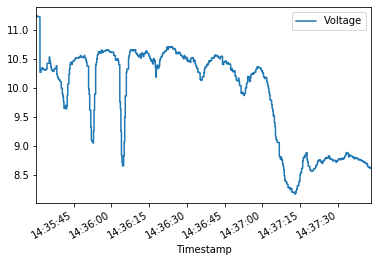

In [98]:
parsed[parsed.Timestamp >= '2019-09-04 14:35:30.226622+00:00'].plot(x='Timestamp', y=['Voltage'])

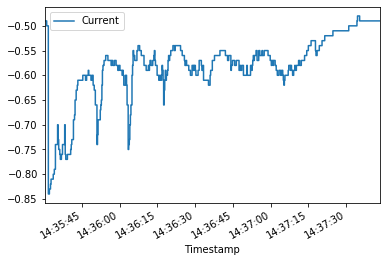

In [95]:
parsed[parsed.Timestamp >= '2019-09-04 14:35:30.226622+00:00'].plot(x='Timestamp', y=['Current'])

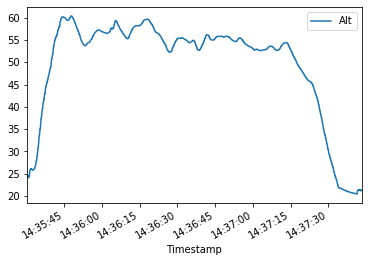

In [94]:
parsed[parsed.Timestamp >= '2019-09-04 14:35:30.226622+00:00'].plot(x='Timestamp', y=['Alt'])

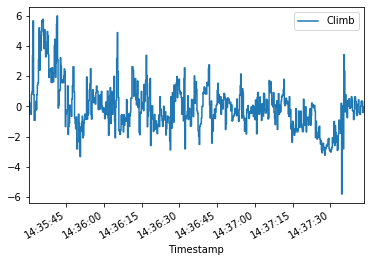

In [99]:
parsed[parsed.Timestamp >= '2019-09-04 14:35:30.226622+00:00'].plot(x='Timestamp', y=['Climb'])

In [103]:
parsed[(parsed.Timestamp >= '2019-09-04 14:35:30.226622+00:00') & (parsed.Timestamp <= '2019-09-04 14:35:45.226622+00:00')].Climb.describe()


count    207.000000
mean       2.372676
std        1.950155
min       -1.343346
25%        0.979811
50%        2.311032
75%        3.819703
max        6.001775
Name: Climb, dtype: float64

In [83]:
parsed[parsed.FlightTime == '2019-09-04 14:35:23.226622+00:00'].Voltage.describe()

count    1934.000000
mean        9.914670
std         0.906984
min         0.000000
25%         8.832000
50%        10.316000
75%        10.529000
max        11.236000
Name: Voltage, dtype: float64